## DIGIT RECOGNIZING - MNIST DATAASET (No pytorch/tf, just NUMPY)


In [216]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


THE MNIST DATASET WAS DOWNLOADED FROM KAGGLE 

In [159]:
data = pd.read_csv('train.csv') #MNIST DATASET from kaggle
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
data.shape #we have 42000 images and 785 columns

(42000, 785)

In [161]:
x = data.iloc[:,1:].values.T  #extracting the pixel value 
y = data.iloc[:,0].values.T   #extracting the labels in the first column
m, n = data.shape
print(x.shape)
y.shape

(784, 42000)


(42000,)

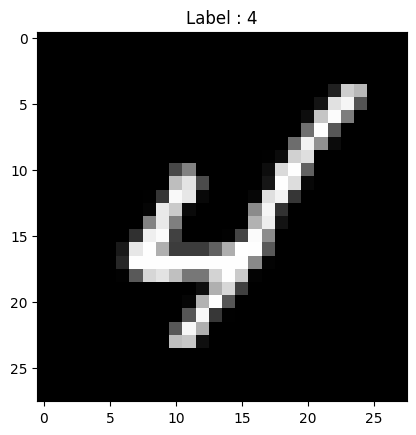

In [203]:
def image(a):
    a = np.random.randint(0, m)
    plt.imshow(x[:, a].reshape(28, 28), cmap='gray')
    plt.title("Label : {}".format(y[a]))
    plt.show()

img = image(0)

In [53]:
def parameters() :
    W1 = np.random.randn(10,784) - 0.5   #adding bias to the wieghts
    W2 = np.random.randn(10,10) - 0.5
    b1 = np.random.randn(10,1) - 0.5
    b2 = np.random.randn(10,1) - 0.5
    return W1, W2, b1, b2

In [54]:
#ACTIVATION FUNCTIONS 
 
def RELU(L):
    return np.maximum(0,x) #rectified linear unit

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0) #softmax function
 

In [212]:
def for_pass() :
    L1 = np.dot(W1, x) + b1 #first layer
    A1 = RELU(L1) #activation function
    L2 = np.dot(W2,A1) + b2 #second layer
    A2 = softmax(L2) #activation function
    return L1,A1,L2,A2


In [213]:

def back_pass(A1, A2, W2, y) :
    dL2 = A2 - y #error in the second layer
    dW2 = np.dot(dL2, A1.T)/m #gradient of the weights in the second layer
    db2 = np.sum(dL2, axis=1, keepdims=True)/m #gradient of the bias in the second layer
    dL1 = np.dot(W2, dL2) #error in the first layer
    dW1 = np.dot(dL1, x.T) #gradient of the weights in the first layer
    db1 = np.sum(dL1, axis=1, keepdims=True)/m #gradient of the bias in the first
    return dW1, dW2 , db1, db2
  


In [215]:
def weight_update(W1, W2, b1, b2, dW1, dW2, db1, db2, alpha) :
    W1 = W1 - alpha*dW1    #aplha is the learning rate
    W2 = W2 - alpha*dW2
    b1 = b1 - alpha*db1
    b2 = b2 - alpha*db2
    return W1, W2, b1, b2